In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
type(train_images), train_images.shape, train_labels.shape

(numpy.ndarray, (60000, 28, 28), (60000,))

In [6]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

### Normalization

In [26]:
test_images, train_images = test_images/255., train_images/255.

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

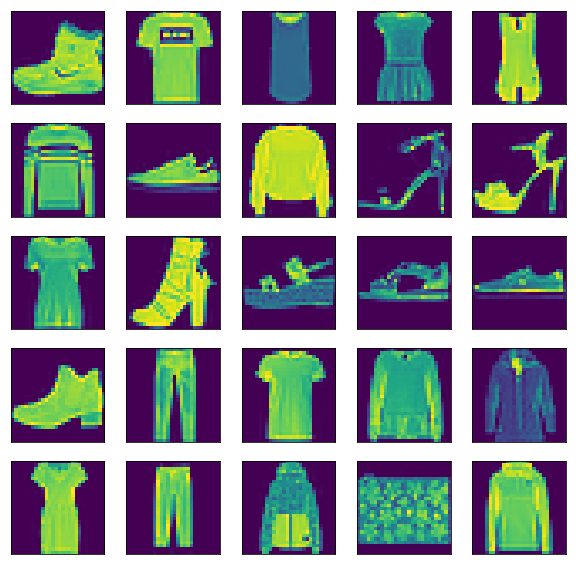

In [29]:
fig, axes = plt.subplots(5,5,figsize=(10,10))
fig.set_facecolor('white')
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

> `tf.train.AdamOptimizer() => tf.optimizers.Adam()` in tf2.0

In [31]:
model.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5002
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3819
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3390
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3171
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2992


In [32]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3529


0.3529351595401764

In [33]:
model.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2845
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2699
Epoch 3/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2596
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2502
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2381
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2302
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2241
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2181
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2114
Epoch 10/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2076


In [34]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3460


0.34600661627054213

In [37]:
np.set_printoptions(suppress=1)

In [41]:
classfications = model.predict(test_images)
np.argmax(classfications[0])

9

In [40]:
test_labels[0]

9

### Exercise 2 -- 增加隐藏层神经元数

In [79]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])
model2.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
t = model2.fit(train_images, train_labels, epochs=5)
print(f"Evaluation cost will be...")
model2.evaluate(test_images, test_labels)
classficatios = model2.predict(test_images)

Epoch 1/5
60000/60000 [==============================] - 16s 264us/sample - loss: 5.2547
Epoch 2/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.5163
Epoch 3/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.5043
Epoch 4/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.4964
Epoch 5/5
60000/60000 [==============================] - 13s 214us/sample - loss: 0.4722
Evaluation cost will be...
10000/10000 [==============================] - 1s 83us/sample - loss: 2.2895


In [81]:
dir(t)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [46]:
assert test_labels[2] == np.argmax(classfications[2])

### Exercise 3 -- 取消输入层

In [51]:
model3 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])
model3.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
try:
    model3.fit(train_images, train_labels, epochs=5)
    print(f"Evaluation cost will be...")
    model3.evaluate(test_images, test_labels)
    classficatios = model3.predict(test_images)
    assert test_labels[2] == np.argmax(classfications[2])
    print('Assert pass')
except Exception as e:
    print(f"got error: {e}")

Epoch 1/5
got error: logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node loss_7/output_1_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_keras_scratch_graph_356461]


### Exercise 4 -- 输出层神经元与待分类数不符

In [52]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax),
])
model4.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
try:
    model4.fit(train_images, train_labels, epochs=5)
    print(f"Evaluation cost will be...")
    model4.evaluate(test_images, test_labels)
    classficatios = model4.predict(test_images)
    assert test_labels[2] == np.argmax(classfications[2])
    print('Assert pass')
except Exception as e:
    print(f"got error: {e}")

Epoch 1/5
got error: Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 1 2 3 5 1 6 3 1 5 0 5 9 3 0 0 3 7 2 7 6 4 2 0 9 0 2 2 8 5 4 2 9
	 [[{{node loss_8/output_1_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_keras_scratch_graph_357036]


### Exercise 5 -- 增加隐藏层数
> 对简单数据影响不大

In [54]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])
model5.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
try:
    model5.fit(train_images, train_labels, epochs=5)
    print(f"Evaluation cost will be...")
    model5.evaluate(test_images, test_labels)
    classficatios = model5.predict(test_images)
    assert test_labels[2] == np.argmax(classfications[2])
    print('Assert pass')
except Exception as e:
    print(f"got error: {e}")

Epoch 1/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4712
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3565
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3215
Epoch 4/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2962
Epoch 5/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2804
Evaluation cost will be...
10000/10000 [==============================] - 0s 44us/sample - loss: 0.3901
Assert pass


### Exercise 6 -- 增加epochs数

In [55]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])
model5.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')
try:
    model5.fit(train_images, train_labels, epochs=15)
    print(f"Evaluation cost will be...")
    model5.evaluate(test_images, test_labels)
    classficatios = model5.predict(test_images)
    assert test_labels[2] == np.argmax(classfications[2])
    print('Assert pass')
except Exception as e:
    print(f"got error: {e}")

Epoch 1/15
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5016
Epoch 2/15
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3800
Epoch 3/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3376
Epoch 4/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3144
Epoch 5/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2954
Epoch 6/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2796
Epoch 7/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2693
Epoch 8/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2585
Epoch 9/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2488
Epoch 10/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2383
Epoch 11/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2310
Epoch 12/15
60000/60000 [=====

### Exercise 7 -- 原始数据有Normalization的区别
> Normalization之后的数据更好用

In [65]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = np.array(train_images,dtype='float')
nor_training_images=train_images/255.0
nor_test_images=test_images/255.0
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
print("Train with raw data:")
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
print('----------------------')
model_ = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
print("Train with normalized data:")
model_.fit(nor_training_images, train_labels, epochs=5)
model_.evaluate(nor_test_images, test_labels)

Train with raw data:
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 4.9979
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5481
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5233
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5086
Epoch 5/5
10000/10000 [==============================] - 0s 34us/sample - loss: 0.6126
----------------------
Train with normalized data:
Epoch 1/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4732
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3580
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3231
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2990
Epoch 5/5
10000/10000 [==============================] - 0s 36us/sample - loss: 0.3545


0.35446181035041807

### Exercise 8 -- Call back function

In [82]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>.6):
          print("\nReached 60% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# metrics默认loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
59552/60000 [============================>.] - ETA: 0s - loss: 0.4783 - accuracy: 0.8293
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4780 - accuracy: 0.8295
